why do we need?
  ⎿  ⧉ Selected 1 lines from day53-polynomial-regression/polynomial-regression.ipynb in Visual Studio Code

⏺ Pipeline ka use karne ki zarurat isliye hoti hai:

  Problem without Pipeline:
  # Step 1: Transform data
  poly_features = PolynomialFeatures(degree=2)
  X_poly = poly_features.fit_transform(X)

  # Step 2: Scale data  
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_poly)

  # Step 3: Train model
  model = LinearRegression()
  model.fit(X_scaled, y)

  # Test time par - Manual steps repeat karne padte hain!
  X_test_poly = poly_features.transform(X_test)
  X_test_scaled = scaler.transform(X_test_poly)
  y_pred = model.predict(X_test_scaled)

  With Pipeline - Ek saath sab kuch:
  pipeline = Pipeline([
      ('poly', PolynomialFeatures(degree=2)),
      ('scaler', StandardScaler()),
      ('model', LinearRegression())
  ])

  # Training - Ek line mein!
  pipeline.fit(X, y)

  # Testing - Ek line mein!
  y_pred = pipeline.predict(X_test)

  Main benefits:
  1. No mistakes - Transform steps miss nahi hote
  2. Cleaner code - Less repetitive code
  3. Prevents data leakage - Test data pe galat transforms nahi hote
  4. Easy to reproduce - Same steps har baar
  5. Cross-validation friendly - Ek unit ki tarah treat hota hai

  Pipeline basically tumhare preprocessing aur modeling steps ko ek "black box" mein package kar deta hai!

In [65]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

np.random.rand(200, 1) explain this syntax

⏺ np.random.rand(200, 1) syntax breakdown:

  np.random.rand(dimensions)

  Parameters:
  - 200: Number of rows (samples)
  - 1: Number of columns (features)

  What it creates:
  - Shape: (200, 1) - 2D array
  - Values: Random numbers between 0 and 1 (uniform distribution)
  - Type: Float values

  Example output:
  array([[0.374],
         [0.951],
         [0.731],
         [0.598],
         ...
         [0.156]])  # 200 rows total

  Alternative shapes:
  - np.random.rand(200) → (200,) - 1D array
  - np.random.rand(200, 5) → (200, 5) - 5 features
  - np.random.rand(10, 3, 2) → (10, 3, 2) - 3D array

  Why (200, 1) not (200,)?
  Machine learning mein consistent 2D shape chahiye - even single feature ke liye!

> 6 * np.random.rand(200, 1) - 3 How is this evaluated? Does multiplication happens first or subtraction happens 
  first

⏺ Order of operations (PEMDAS/BODMAS):

  6 * np.random.rand(200, 1) - 3

  Step-by-step evaluation:

  1. First: np.random.rand(200, 1) → Random values [0, 1)
  2. Then: 6 * [random values] → Values [0, 6)
  3. Finally: [0 to 6 values] - 3 → Values [-3, 3)

  Example:
  # Step 1: Random values
  rand_vals = [0.2, 0.7, 0.9, 0.1]  # Between 0-1

  # Step 2: Multiply by 6
  after_mult = [1.2, 4.2, 5.4, 0.6]  # Between 0-6

  # Step 3: Subtract 3
  final = [-1.8, 1.2, 2.4, -2.4]  # Between -3 to +3

  Operator precedence:
  - * (multiplication) has higher precedence than - (subtraction)
  - So multiplication happens first, then subtraction

  Result: Random values uniformly distributed between -3 and +3!

> 6 * np.random.rand(200, 1) - 3 aisa kyun kiya,normal np.linspace use kyun nahi kiya
  ⎿  ⧉ Selected 1 lines from day53-polynomial-regression/polynomial-regression.ipynb in Visual Studio Code

⏺ Random vs Linspace - Key difference:

  np.linspace(-3, 3, 200):
  # Evenly spaced points
  [-3.0, -2.97, -2.94, -2.91, ..., 2.97, 3.0]
  # Perfectly ordered, predictable

  6 * np.random.rand(200, 1) - 3:
  # Random scattered points
  [-2.1, 1.8, -0.5, 2.7, -1.3, 0.9, ...]
  # Completely random order

  Why random better for ML:

  1. Real-world data - Data kabhi perfectly ordered nahi hota
  2. Model testing - Random data pe zyada robust model banta hai
  3. Avoid overfitting - Ordered data mein patterns artificially strong ho sakte hain
  4. Better generalization - Random training data se model better generalizes

  Example analogy:
  - Linspace = Students ko height ke hisab se line mein khada karna
  - Random = Students randomly khade hain (real classroom situation)

  Machine learning mein hum real-world scenarios simulate karna chahte hain, isliye random data better hai!

In [66]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

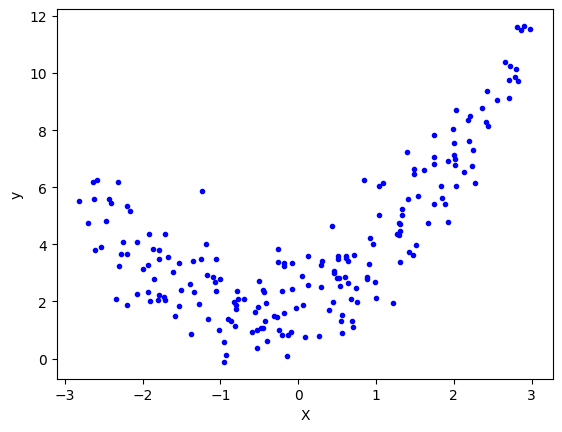

In [67]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [68]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
# Applying linear regression
lr = LinearRegression()

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

r2_score(y_test,y_pred) of 0.3533.what does this denote?
  ⎿  ⧉ Selected 1 lines from day53-polynomial-regression/polynomial-regression.ipynb in Visual Studio Code

⏺ R² Score = 0.3533 ka matlab:

  Simple explanation:
  - Model sirf 35.33% variance explain kar pa raha hai
  - Baaki 64.67% variance unexplained hai

  R² Score ranges:
  - 1.0 = Perfect model (100% accurate)
  - 0.5 = Decent model (50% variance explained)
  - 0.0 = Model is useless (predictions = mean value)
  - Negative = Model is worse than just using mean

  0.3533 interpretation:
  - Poor to Fair performance
  - Model kuch pattern catch kar raha hai, but not enough
  - Improvement ki zarurat hai

  Possible reasons:
  1. Underfitting - Model too simple hai
  2. More features chahiye
  3. Higher polynomial degree try karo
  4. More data chahiye

  Action items:
  - Try degree=3 or degree=4 polynomial
  - Check for outliers
  - Add more training data
  - Feature engineering karo

  Bottom line: 35% is below average - model ko improve karna padega!

In [71]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3679836338693592

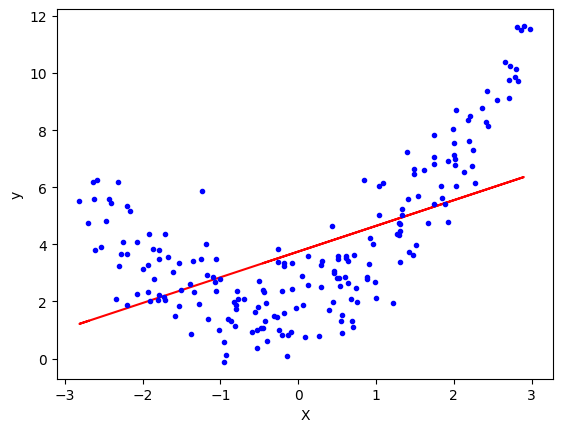

In [72]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [73]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [74]:
print(X_train.shape)
print(X_train_trans.shape)

(160, 1)
(160, 3)


In [75]:
print(X_train[0])
print(X_train_trans[0:5])

[-0.44918191]
[[ 1.         -0.44918191  0.20176439]
 [ 1.          1.09317948  1.19504137]
 [ 1.          1.741535    3.03294415]
 [ 1.          0.70428819  0.49602185]
 [ 1.          1.33121379  1.77213016]]


In [76]:
# include_bias parameter

In [77]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(X_test_trans)

In [82]:
r2_score(y_test,y_pred)

0.8509836281112787

In [83]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89878457 0.78083966]]
[2.01151272]


In [24]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

In [88]:
y_new.shape

(200,)

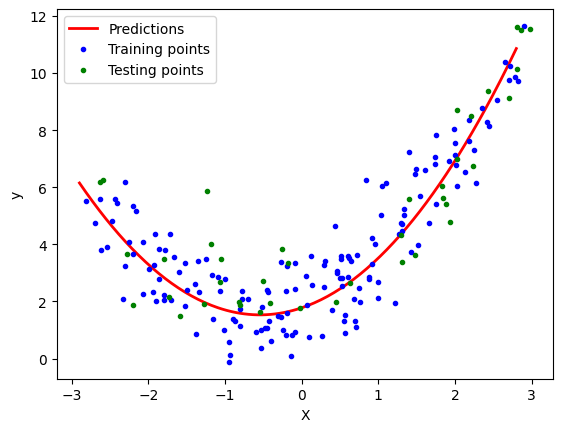

In [89]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [30]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

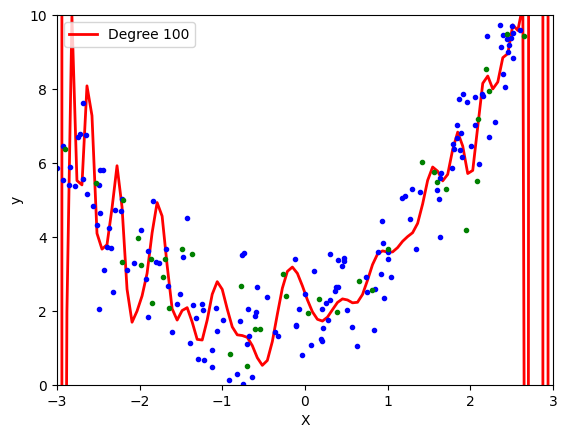

In [34]:
polynomial_regression(100)

In [20]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

/Users/p0a0221/Downloads/campusx-notes/100-days-of-machine-learning/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


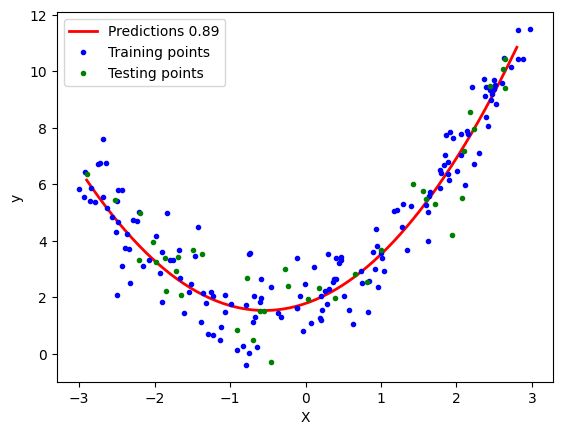

In [35]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [90]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [91]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [92]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [93]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [94]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [111]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

Ye lines PolynomialFeatures object ki properties ko explain karte hain. Hinglish mein samjhata hun:

  Code Explanation:

  1. poly.n_features_in_

  Kya hai: Ye batata hai ki kitne input features hain original data mein
  Example: Agar aapke paas X, Y coordinates hain, toh ye 2 hoga (2 input features)

  2. poly.n_output_features_

  Kya hai: Ye batata hai ki polynomial transformation ke baad kitne total features ban gaye
  Example: Degree 2 transformation mein 2 inputs se 6 features ban jaate hain:
  - 1 (constant term)
  - x, y (original features)
  - x², y² (squared terms)
  - xy (interaction term)

  3. poly.powers_

  Kya hai: Ye array hai jo har feature ke liye power combinations show karta hai
  Format: [x_power, y_power]

  Example output:
  [[0, 0]] → 1 (constant)
  [[1, 0]] → x¹
  [[0, 1]] → y¹
  [[2, 0]] → x²
  [[1, 1]] → xy
  [[0, 2]] → y²

  Simple analogy: Agar aap polynomial equation banate hain, ye tools aapko batate hain ki kitne ingredients
  (features) use hue aur kaise combine kiye gaye!

In [112]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 10
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [113]:
X_multi_trans.shape

(100, 10)

In [114]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [115]:
X_test_multi = poly.transform(final)

In [116]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [117]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()